In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from causalml.propensity import GradientBoostedPropensityModel 

# 准备数据集，将特征和标签分开
data = pd.read_csv('./data/-999_train.csv')  # 读取数据集


def see_data(data,col,width= 0.01):
    data = data.iloc[:,col]
    
    value_counts = {}
    for value in data:
               
               if value in value_counts:
                  value_counts[value] += 1
               else:
                  value_counts[value] = 1
    values = list(value_counts.keys())
    frequencies = list(value_counts.values())
    plt.bar(values, frequencies,width=width)
    plt.title(col)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()


 

In [2]:
kwa = {
            "max_depth": 8,
            "learning_rate": 0.1,
            "n_estimators": 100,
            "objective": "binary:logistic",
            "nthread": -1,
            "colsample_bytree": 0.8,
            "random_state": 42,
        }
pro_s =  GradientBoostedPropensityModel (early_stop=False, clip_bounds=(1e-3, 1 - 1e-3), **kwa)
data = data.iloc[:,1:]

X = data.drop(['y','treatment'],axis=1) # 特征列
y = data['y']  # 标签列
treatment = data['treatment'] 
pro_s.fit(X,treatment)
the_pro_score = pro_s.predict(X)

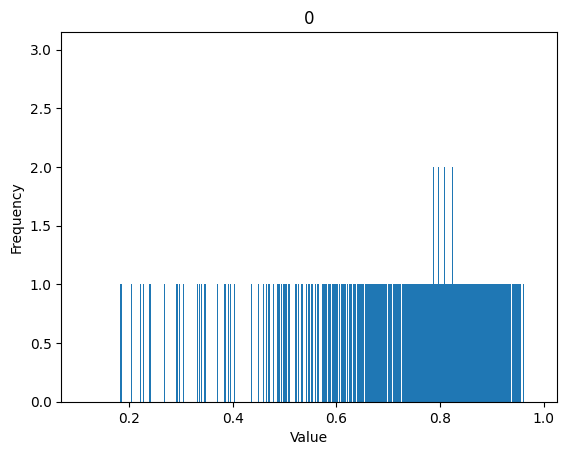

In [3]:

tps = pd.DataFrame(the_pro_score)
see_data(tps,0,width= 0.0001)

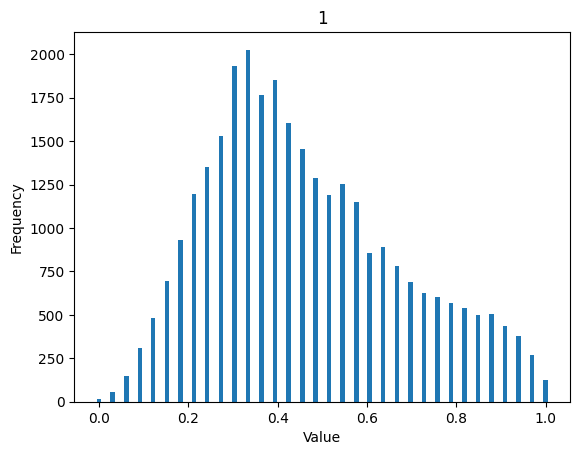

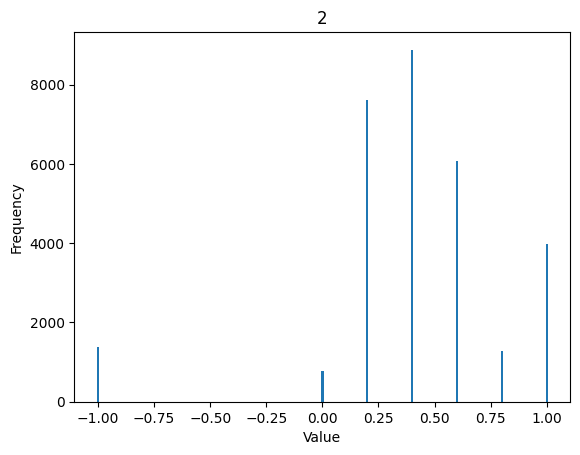

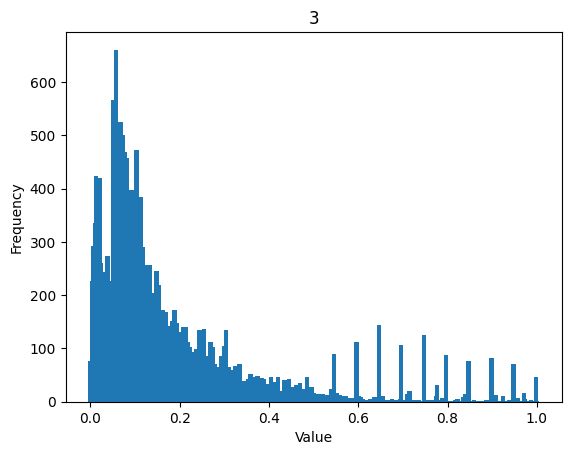

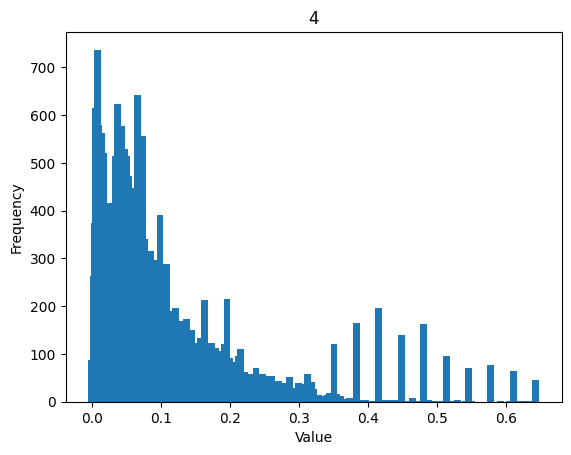

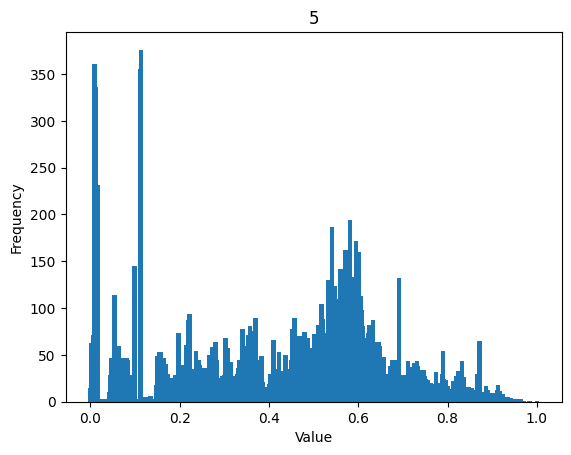

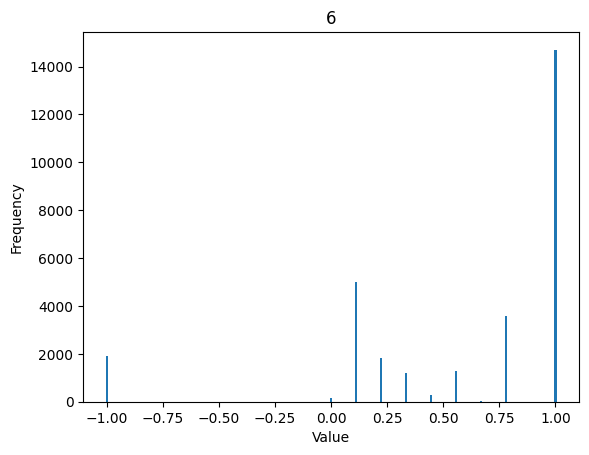

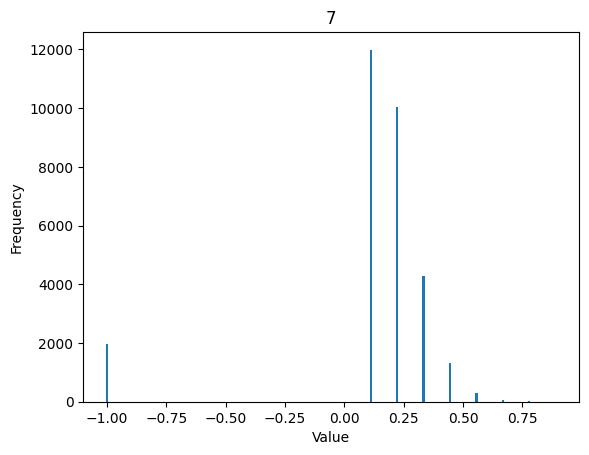

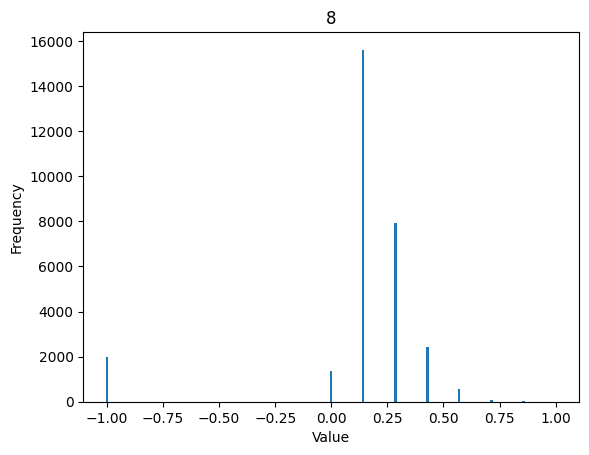

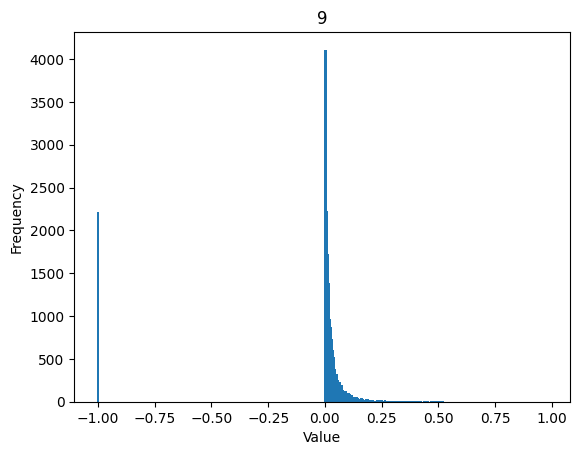

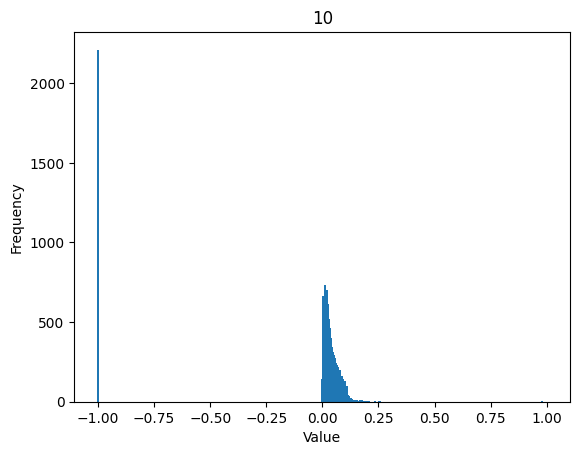

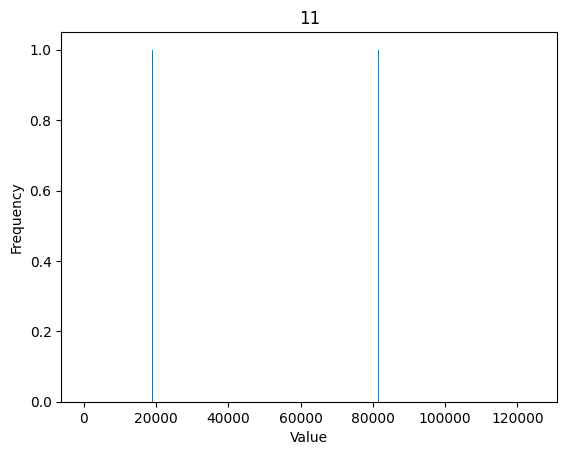

In [4]:
for i in range(0,11):
 see_data(data,i+1,0.01)